# **Required Libraries**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle


from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# **Data Loading**

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


# **Info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Distribution of Gender**

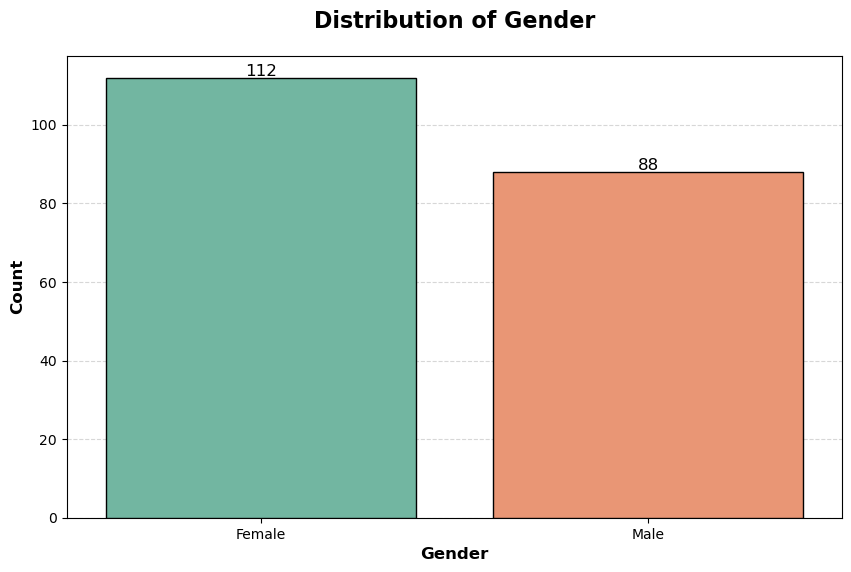

In [7]:
gender=df.value_counts('Gender').reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=gender, x='Gender', y='count',hue='Gender', palette='Set2', zorder=3, edgecolor='black')

plt.title('Distribution of Gender', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')


for i,v in enumerate(gender['count']):
    plt.text(i,v+0.5, str(v), ha='center', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.show()

# **Actual Pairplot**

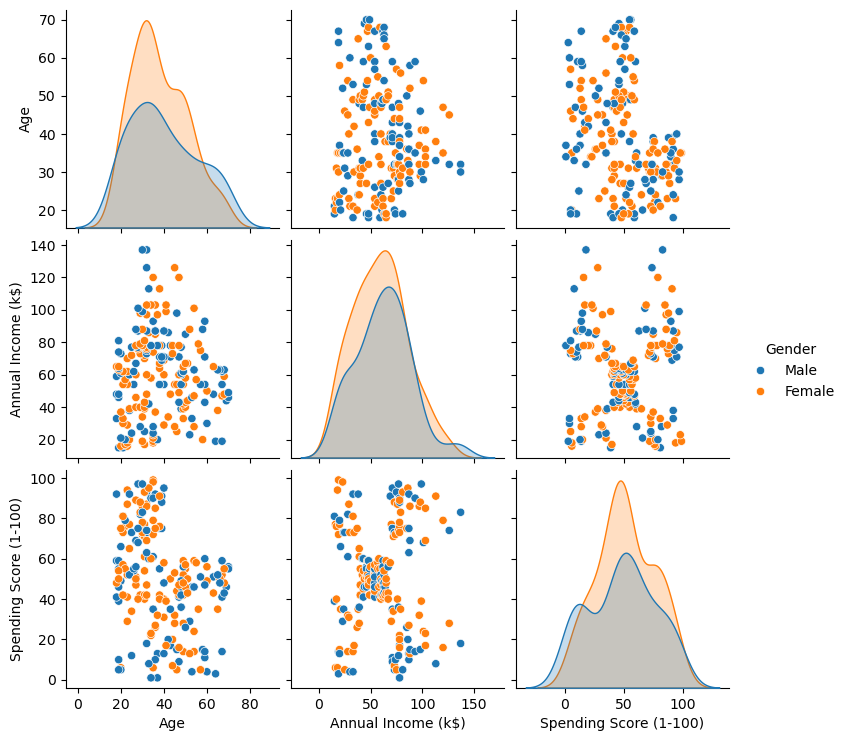

In [9]:
import warnings
warnings.filterwarnings("ignore")

pair = df[['Age', 'Annual Income (k$)','Spending Score (1-100)', 'Gender']]
sns.pairplot(data=pair, hue='Gender')
plt.show()

warnings.filterwarnings("default")  

# **Encoding Gender Feature** 

In [10]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


# **Feature**

In [12]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

# **Elbow Method for Optimal Cluster Selection**

In [14]:
warnings.filterwarnings("ignore")
Clusters=[]

for i in range(2, 21):
    km=KMeans(n_clusters=i, init='k-means++', n_init='auto')
    km.fit(X)
    Clusters.append(km.inertia_)

# **Line Plot Of Elbow Method**

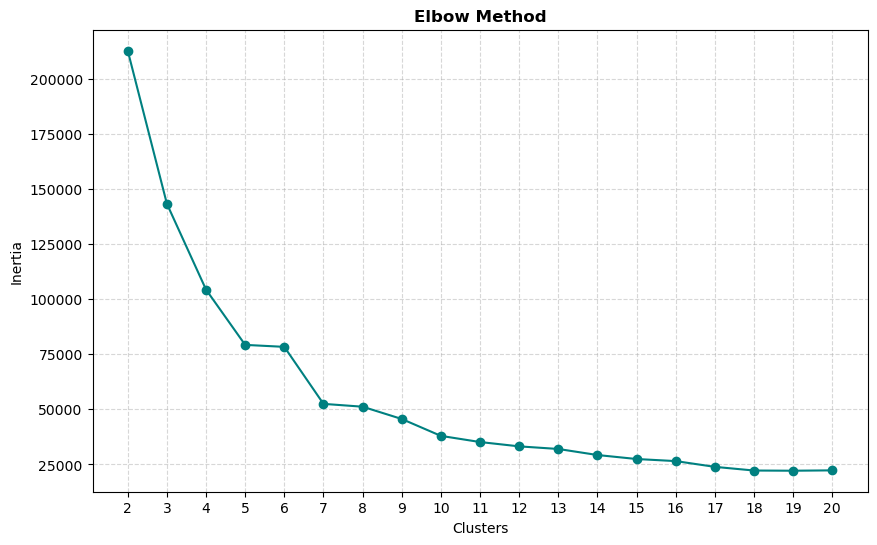

In [15]:
plt.figure(figsize=(10,6))

plt.plot([i for i in range(2,21)], Clusters, marker='o', color='teal')

plt.title('Elbow Method', fontweight='bold')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

plt.xticks([i for i in range(2,21)])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# **Model**

In [16]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

model=KMeans(n_clusters=5, random_state=42, n_init=10)
df['Clusters']= model.fit_predict(X)
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0


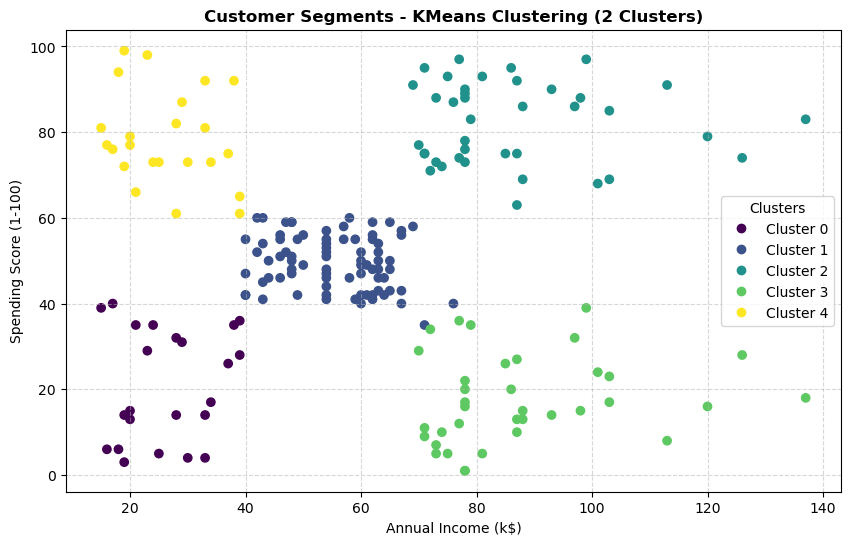

In [17]:
plt.figure(figsize=(10,6))

scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Clusters'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments - KMeans Clustering (2 Clusters)', fontweight='bold')


legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

plt.grid(True, alpha=0.5, linestyle='--')

plt.show()

# **Predicted Pairplot**

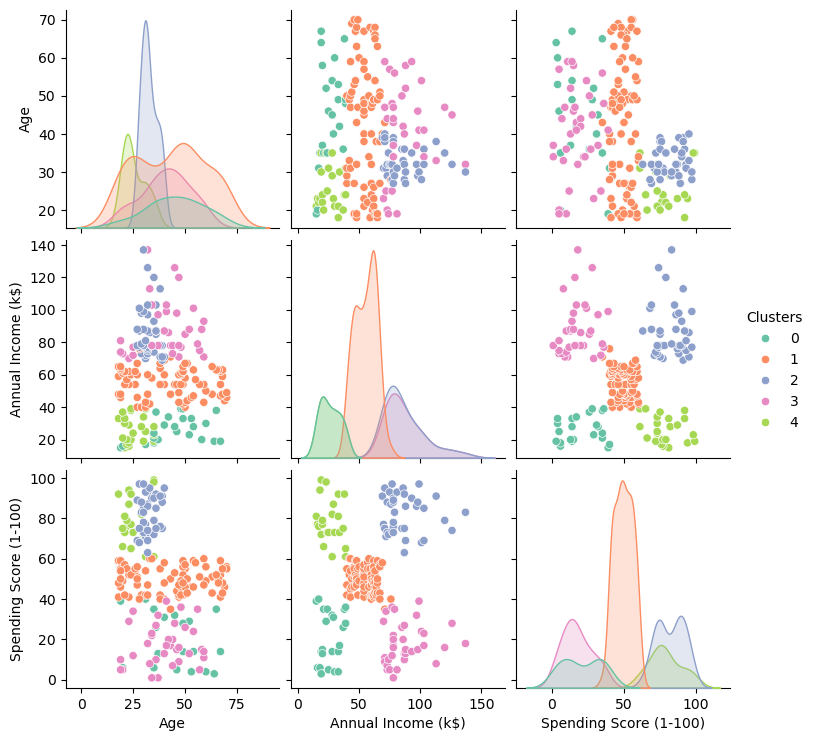

In [18]:
warnings.filterwarnings("ignore")


pair_data = df[['Age', 'Annual Income (k$)','Spending Score (1-100)', 'Clusters']]

sns.pairplot(data=pair_data, hue='Clusters', palette='Set2')
plt.show()

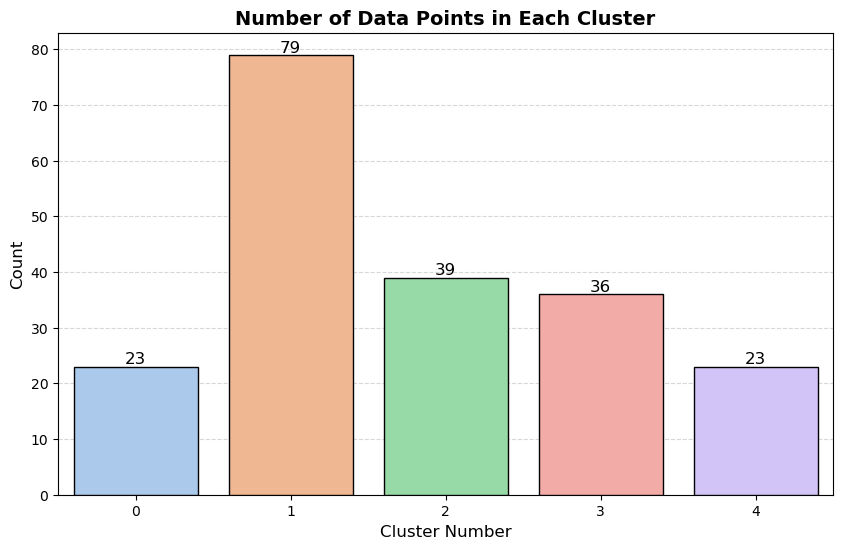

In [19]:
clusters_count = df.value_counts('Clusters').reset_index(name='num of clusters')


clusters_count = clusters_count.sort_values('Clusters', ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(data=clusters_count, x='Clusters', y='num of clusters', 
            palette='pastel', edgecolor='black', zorder=3, order=clusters_count['Clusters'])

plt.grid(True, alpha=0.5, linestyle='--', axis='y')

for i,v in enumerate(clusters_count['num of clusters']):
    plt.text(i, v+0.5, str(v), ha='center', fontsize=12)
    
plt.title('Number of Data Points in Each Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster Number', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

# **Pie Chart : Distribution of Data Points Across Clusters**

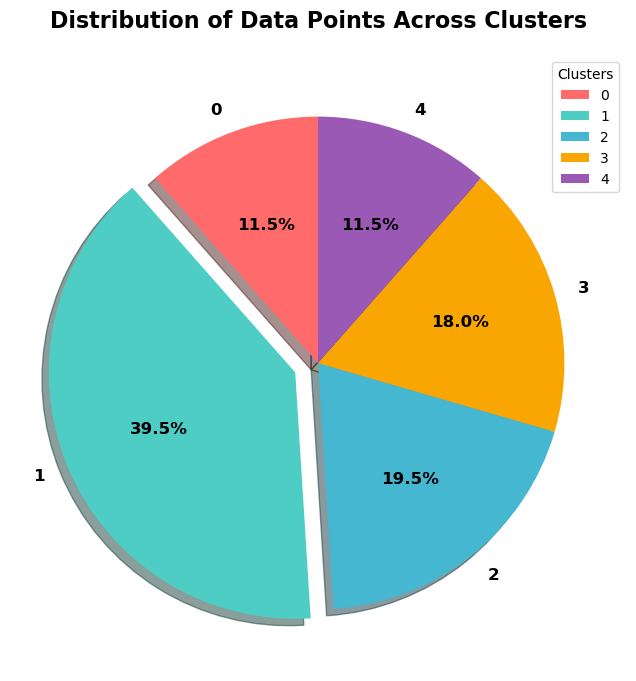

In [23]:
explode = [0.0, 0.1, 0, 0, 0]


colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9A602', '#9B59B6']

plt.figure(figsize=(12, 8))
plt.pie(clusters_count['num of clusters'], 
        labels=clusters_count['Clusters'], 
        autopct='%1.1f%%', 
        explode=explode,
        colors=colors,
        shadow=True,  
        startangle=90,  
        textprops={'fontsize': 12, 'fontweight': 'bold'})


plt.title('Distribution of Data Points Across Clusters', 
          fontsize=16, fontweight='bold', pad=20)

plt.legend(clusters_count['Clusters'], title="Clusters", loc="best")

plt.show()

In [30]:
with open('kmeans_model.pkl','wb') as file:
    pickle.dump(model, file)

In [31]:
# Load model
with open("kmeans_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Example prediction
sample = [[25, 40, 70]]  # Age=25, Income=40k, Spending=70
cluster = loaded_model.predict(sample)
print("Cluster:", cluster[0])


Cluster: 4
